In [43]:
get_recommendations('Star Wars', cosine_sim2)

1990                         The Empire Strikes Back
1490                              Return of the Jedi
229     Star Wars: Episode III - Revenge of the Sith
230     Star Wars: Episode II - Attack of the Clones
233        Star Wars: Episode I - The Phantom Menace
260                                     Ender's Game
4401                             The Helix... Loaded
83                                        The Lovers
193                                      After Earth
4117                              Six-String Samurai
Name: title, dtype: object

In [41]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [40]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [39]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [38]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [37]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [36]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [35]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [34]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [33]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [32]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [31]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [27]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [26]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [25]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [24]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

Text(0.5, 1.0, 'Popular Movies')

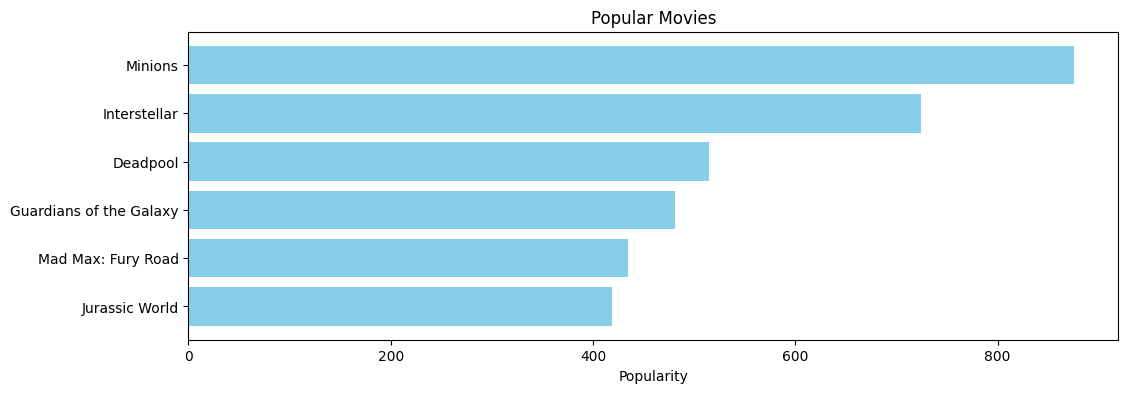

In [22]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [19]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(3)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020


In [18]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [17]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [16]:
C= df2['vote_average'].mean()
print (C)
m= df2['vote_count'].quantile(0.9)
print (m)
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

6.092171559442016
1838.4000000000015


(481, 23)

In [15]:
df1.columns = ['id','title_1','cast','crew']
df2= df2.merge(df1,on='id')
print ('df2 shape is', df2.shape)

df2 shape is (4803, 23)


In [14]:
df1 = pd.read_csv(str(path + '/tmdb_5000_credits.csv'))
df2 = pd.read_csv(str(path + '/tmdb_5000_movies.csv'))
print ('df1 shape is', df1.shape)
print ('df2 shape is', df2.shape)

df1 shape is (4803, 4)
df2 shape is (4803, 20)


In [7]:
path = kagglehub.dataset_download('tmdb/tmdb-movie-metadata')
print('TMDB path = ',path)

100%|██████████| 8.89M/8.89M [00:00<00:00, 9.55MB/s]

Extracting files...


TMDB path =  C:\Users\student\.cache\kagglehub\datasets\tmdb\tmdb-movie-metadata\versions\2


In [5]:
import numpy as np
import pandas as pd
import kagglehub

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%pip install kagglehub
%pip install pandas 
%pip install numpy
%pip install requests
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 464.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.1/8.7 MB 991.0 kB/s eta 0:00:09
   ---------------------------------------- 0.1/8.7 MB 845.5 kB/s eta 0:00:11
    --------------------------------------- 0.2/8.7 MB 919.0 kB/s eta 0:00:10
    --------------------------------------- 0.2/8.7 MB 892.5 kB/s eta 0:00:10
   - -------------------------------------- 0.3/8.7 MB 927.4 kB/s eta 0:00:10
   - -------------------------------------- 0.3/8.7 MB 930.9 kB/s eta 0:00:10
   - -----------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import requests
import json
import tkinter as tk

api_key = '357fcc03712285274a03de8a0ac8b25e'

root = tk.Tk()
root.title ('The Movie DataBase')
root.geometry ('500x500')

label_movie = tk.Label(root, text='Movie ID')
label_movie.pack(pady=(15,5))
entry_movie = tk.Entry(root, width = 25)
entry_movie.pack()

show_variable = tk.StringVar()
show_area = tk.Label(root, 
     textvariable = show_variable,
     font = ('Helvetica', 12),
     bg = 'lightyellow',
     wraplength = 380,
     justify = 'left')
show_area.pack(pady=20, padx=10, fill='both', expand=True)

def print_movie():
    movie_id = entry_movie.get()
    print ('Moive ID = ', movie_id)
    print ('-'*30)

button_print = tk.Button(root, text = 'Print', command = print_movie)
button_print.pack(pady=15)

def print_recommendations():
    movie_id = entry_movie.get()
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
    response = requests.get(url)
    data = response.json()
    title_name = data.get('title')
    print ('Title Name = ', title_name)
    print ('-' * 30)

    show_variable.set(get_recommendations(title_name, cosine_sim2))

button_recommendations = tk.Button(root, text='Recommend Movie', command=print_recommendations)
button_recommendations.pack(pady=15)

root.mainloop()

Title Name =  Star Wars
------------------------------
